<a href="https://colab.research.google.com/github/Braafisch/KI-Aufgaben/blob/main/aufgabe_2/aufgabe_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### 1 Würfelspiel mit Münzen
Wir betrachten folgendes Spiel: Zuerst werfen wir einen sechseitigen Würfel, nun werfen wir für jedes
erwürfelte Auge eine Münze (z.B. wenn wir vier Augen werfen, dürfen wir vier Münzen werfen). Sei nun
Y die Anzahl Köpfe im zweiten Wurf. Geben Sie die Dichte-Funktion fY (y) an, gerne dürfen Sie eine
Python Funktion schreiben welche die Wahrscheinlichkeiten für Sie berechnet (Tipp: Klasse binom im
Paket scipy.stats).

In [ ]:
def f_Y(y):
  p = 0
  for n in range((y if y != 0 else 1), 7):
    p += 1/6*stats.binom.pmf(y,n,0.5)
  return p

In [ ]:
print(f_Y(4))

0.07552083333333331


###  Bayes Theorem
Wir betrachten einen medizinischen Test um auf eine Krankheit zu testen (z.B. ein Corona-Test). Das
Ergebnis bezeichnen wir mit $Y$ , wobei $Y = 1$ ein positives Testergebnis (Person ist laut Test krank)
und $Y = 0$ ein negatives Testergebnis bezeichnet. Mit $X$ bezeichnen wir den Gesundheitszustand der
Person, wobei $X = 0$: gesund, $X = 1$ krank. Solche Tests sind immer fehlerbehaftet, in unserem Fall sei
$P(Y = 1|X = 1) = 0.9$ (das nennt man die Sensitivität) und $P(Y = 0|X = 0) = 0.95$ (Spezifität).
1. Nehmen wir an, die a-priori-Wahrscheinlichkeit krank zu sein, sei $3%$, berechnen Sie nun die
Wahrscheinlichkeit, dass eine positiv getestete Person gesund ist, sowie die Wahrscheinlichkeit das
eine negativ getestete Person krank ist.
2. Nehmen wir nun an, die a-priori-Wahrscheinlichkeit krank zu sein, sei $30%$, berechnen Sie nun die
oben genannten Wahrscheinlichkeiten.


geg: $P\left(Y=1|X=1\right)=0.9$, $P(Y = 0|X = 0) = 0.95$, $P(X=1)=0.03$

ges: $P\left(X=0|Y=1\right)$, $P\left(X=1|Y=0\right)$

In [34]:
p_y_1_x_1 = 0.9
p_y_0_x_0 = 0.95
p_x_1 = 0.03

$P\left(Y=0|X=1\right)=1-P\left(Y=1|X=1\right)$

$P\left(Y=1|X=0\right)=1-P\left(Y=0|X=0\right)$

$P(X=0)=1-P(X=1)$

In [35]:
p_y_0_x_1 = 1.0-p_y_1_x_1
p_y_1_x_0 = 1.0-p_y_0_x_0
p_x_0 = 1.0-p_x_1
print(p_y_0_x_1, p_y_1_x_0, p_x_0)

0.09999999999999998 0.050000000000000044 0.97


$P(Y=1)=P(Y=1|X=0)P(X=0)+P(Y=1|X=1)P(X=1)$

$P(Y=0)=1-P(Y=1)$

In [36]:
p_y_1 = p_y_1_x_0*p_x_0+p_y_1_x_1*p_x_1
p_y_0 = 1.0-p_y_1
print(p_y_1, p_y_0)

0.07550000000000004 0.9245


$P(Y=0|X=1)=\frac{P(Y=1|X=0)P(X=0)}{P(Y=1)}$

In [37]:
p_x_0_y_1 = p_y_1_x_0*p_x_0/p_y_1
print(p_x_0_y_1)
p_x_1_y_0 = p_y_0_x_1*p_x_1/p_y_0
print(p_x_1_y_0)

0.6423841059602652
0.003244997295835586


### 3 Normalverteilung



Im folgende Code-Stück sehen wir ein Beispiel für einen LinePlot:

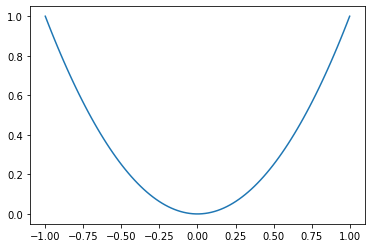

In [38]:
# array with 100 points equally spaced in [-1,1]
x = np.linspace(-1, 1, 100)
y = x*x
plt.plot(x, y);

Das Statistik-Modul von scipy enthält die Klasse norm. Der folgende Befehl gibt eine standardnormalverteilte Zufallsvariable zurück.

In [39]:
import scipy.stats as stats
rv = stats.norm(1, 2) # Mittelwert und Standardabweichung
# Wahrscheinlichkeit am Punkt x=0
print('Erwartungswert', rv.mean() )
print('Varianz', rv.var() )
print('Wahrscheinlichkeiten', rv.pdf(np.array([1,2,3])))

Erwartungswert 1.0
Varianz 4.0
Wahrscheinlichkeiten [0.19947114 0.17603266 0.12098536]


Beachten Sie: die Zufallsvariable hat eine Methode pdf (probability density function). Diskrete ZV
haben stattdessen die Methode pmf (probability mass function)
1. Stellen Sie die Dichtefunktion einer Normalverteilung für µ = −1 und σ = 2 dar. Geben sie auch
die Varianz aus.
2. Die Zufallsvariable rv besitzt die Methode rvs:`print(rv.rvs(size=5))` Erzeugen Sie 1000 Samples aus einer standardnormalverteilten Zufallsvariable und stellen Sie ein normiertes Histogramm mit der Funktion plt.hist() graphisch dar (lesen Sie die Dokumentation der Methode für die notwendige Option). Fügen Sie die Dichte der Funktion in dasselbe Schaubild
hinzu (Sie erreichen dies, indem Sie die plt.plot() und die plt.hist() Funktion in der selben
Zelle ausführen).

In [40]:
print(rv.rvs(size=5))

[ 0.98197968 -0.82462094  1.2374925   5.24726944  2.25331262]
